Assessing model accuracy (10-Fold Cross-Validation) and Response time

- Logistic Regression
- k-Nearest Neighbors
- LDA (Linear Discriminant Analysis)
- QDA (Quadratic Discriminant Analysis)
- Naive Bayes
- Tree-based Approaches
- Support Vector Machines (SVM)

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import neighbors
import numpy as np
import seaborn as sns


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import time

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

In [3]:
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 1)
trainingPercent = 0.8
iterations = 30

# 1. Data Preparation

## 1.1 Load the data

In [4]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## 1.2 Split it into training and test sets

In [5]:
from sklearn.model_selection import train_test_split

y_train, y_test, X_train, X_test  = train_test_split(data["WeakLinks"], data.drop(columns=["WeakLinks"]), train_size = trainingPercent, random_state=5)

# 2. Create the Models

## 2.1 Logistic Regression

In [6]:
lr = LogisticRegression(solver='liblinear', C=3, random_state=0)
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(preds_lr, y_test)
print(accuracy_lr)

0.5827338129496403


In [7]:
lr_cv_scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv = kfolds)

print(lr_cv_scores.min())
print(lr_cv_scores.mean())
print(lr_cv_scores.max())

0.49101796407185627
0.5354195224009812
0.5783132530120482


In [8]:
arr_latency_lr = []

for i in range(0, iterations):
    start_time = time.time()
    preds_lr = lr.predict(X_test)
    end_time = time.time()
    latency_lr = (end_time - start_time) * 1000
    arr_latency_lr.append(latency_lr)
    
np.mean(arr_latency_lr)

1.4778614044189453

## 2.2 k-Nearest Neighbors (kNN)

In [9]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(preds_knn, y_test)
print(accuracy_knn)

0.5851318944844125


In [10]:
knn_cv_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv = kfolds)

print(knn_cv_scores.min())
print(knn_cv_scores.mean())
print(knn_cv_scores.max())

0.4251497005988024
0.5180001442897338
0.592814371257485


In [11]:
arr_latency_knn = []

for i in range(0, iterations):
    start_time = time.time()
    preds_knn = knn.predict(X_test)
    end_time = time.time()
    latency_knn = (end_time - start_time) * 1000
    arr_latency_knn.append(latency_knn)
    
np.mean(arr_latency_knn)

20.868897438049316

## 2.3 LDA (Linear Discriminant Analysis)

In [12]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
preds_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(preds_lda, y_test)
print(accuracy_lda)

0.5611510791366906


In [13]:
lda_cv_scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv = kfolds)

print(lda_cv_scores.min())
print(lda_cv_scores.mean())
print(lda_cv_scores.max())

0.47904191616766467
0.531238727364548
0.5963855421686747


In [14]:
arr_latency_lda = []

for i in range(0, iterations):
    start_time = time.time()
    preds_lda = lda.predict(X_test)
    end_time = time.time()
    latency_lda = (end_time - start_time) * 1000
    arr_latency_lda.append(latency_lda)
    
np.mean(arr_latency_lda)

1.3478755950927734

## 2.4 QDA (Quadratic Discriminant Analysis)

In [15]:
qda = LinearDiscriminantAnalysis()
qda.fit(X_train, y_train)
preds_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(preds_qda, y_test)
print(accuracy_qda)

0.5611510791366906


In [16]:
qda_cv_scores = cross_val_score(qda, X_train, y_train, scoring='accuracy', cv = kfolds)

print(qda_cv_scores.min())
print(qda_cv_scores.mean())
print(qda_cv_scores.max())

0.47904191616766467
0.531238727364548
0.5963855421686747


In [17]:
arr_latency_qda = []

for i in range(0, iterations):
    start_time = time.time()
    preds_qda = qda.predict(X_test)
    end_time = time.time()
    latency_qda = (end_time - start_time) * 1000
    arr_latency_qda.append(latency_qda)
    
np.mean(arr_latency_qda)

1.4620780944824219

## 2.5 Naive Bayes

In [18]:
nb = GaussianNB()
nb.fit(X_train, y_train)
preds_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(preds_nb, y_test)
print(accuracy_nb)

0.4676258992805755


In [19]:
nb_cv_scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv = kfolds)

print(nb_cv_scores.min())
print(nb_cv_scores.mean())
print(nb_cv_scores.max())

0.38323353293413176
0.4832371401774764
0.5508982035928144


In [20]:
arr_latency_nb = []

for i in range(0, iterations):
    start_time = time.time()
    preds_nb = nb.predict(X_test)
    end_time = time.time()
    latency_nb = (end_time - start_time) * 1000
    arr_latency_nb.append(latency_nb)
    
np.mean(arr_latency_nb)

2.0635763804117837

## 2.6 Tree-based Approaches

### Decision Tree Classifier

In [21]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)
preds_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(preds_dtc, y_test)
print(accuracy_dtc)

0.49640287769784175


In [22]:
dtc_cv_scores = cross_val_score(dtc, X_train, y_train, scoring='accuracy', cv = kfolds)

print(dtc_cv_scores.min())
print(dtc_cv_scores.mean())
print(dtc_cv_scores.max())

0.437125748502994
0.49400115431787023
0.592814371257485


In [23]:
arr_latency_dtc = []

for i in range(0, iterations):
    start_time = time.time()
    preds_dtc = dtc.predict(X_test)
    end_time = time.time()
    latency_dtc = (end_time - start_time) * 1000
    arr_latency_dtc.append(latency_dtc)
    
np.mean(arr_latency_dtc)

1.3628244400024414

### Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(max_depth=23)
rfc.fit(X_train, y_train)
preds_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(preds_rfc, y_test)
print(accuracy_rfc)

0.6139088729016786


In [25]:
rfc_cv_scores = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv = kfolds)

print(rfc_cv_scores.min())
print(rfc_cv_scores.mean())
print(rfc_cv_scores.max())

0.5089820359281437
0.5767332804270977
0.6526946107784432


In [26]:
arr_latency_rfc = []

for i in range(0, iterations):
    start_time = time.time()
    preds_rfc = rfc.predict(X_test)
    end_time = time.time()
    latency_rfc = (end_time - start_time) * 1000
    arr_latency_rfc.append(latency_rfc)
    
np.mean(arr_latency_rfc)

18.390003840128582

## 2.7 Support Vector Machines (SVM)

### Linear kernel

In [27]:
svm_linear = SVC(C=2, kernel='linear')
svm_linear.fit(X_train, y_train)
preds_svm_linear = svm_linear.predict(X_test)
accuracy_svm_linear = accuracy_score(preds_svm_linear, y_test)
print(accuracy_svm_linear)

0.5779376498800959


In [28]:
svm_linear_cv_scores = cross_val_score(svm_linear, X_train, y_train, scoring='accuracy', cv = kfolds)

print(svm_linear_cv_scores.min())
print(svm_linear_cv_scores.mean())
print(svm_linear_cv_scores.max())

0.48502994011976047
0.556402856936729
0.6024096385542169


In [29]:
arr_latency_svm_linear = []

for i in range(0, iterations):
    start_time = time.time()
    preds_svm_linear = svm_linear.predict(X_test)
    end_time = time.time()
    latency_svm_linear = (end_time - start_time) * 1000
    arr_latency_svm_linear.append(latency_svm_linear)
    
np.mean(arr_latency_svm_linear)

24.58358605702718

### Radial Kernel

In [30]:
svm_radial = SVC(C=3, kernel='rbf',gamma=1)
svm_radial.fit(X_train, y_train)
preds_svm_radial = svm_radial.predict(X_test)
accuracy_svm_radial = accuracy_score(preds_svm_radial, y_test)
print(accuracy_svm_radial)

0.6235011990407674


In [31]:
svm_radial_cv_scores = cross_val_score(svm_radial, X_train, y_train, scoring='accuracy', cv = kfolds)

print(svm_radial_cv_scores.min())
print(svm_radial_cv_scores.mean())
print(svm_radial_cv_scores.max())

0.5089820359281437
0.5677692807156771
0.6766467065868264


In [32]:
arr_latency_svm_radial = []

for i in range(0, iterations):
    start_time = time.time()
    preds_svm_radial = svm_radial.predict(X_test)
    end_time = time.time()
    latency_svm_radial = (end_time - start_time) * 1000
    arr_latency_svm_radial.append(latency_svm_radial)
    
np.mean(arr_latency_svm_radial)

75.37999153137207

### Polynomial Kernel

In [33]:
svm_polynomial = SVC(C=5, kernel='poly', degree=4 ,gamma = 0.1)
svm_polynomial.fit(X_train, y_train)
preds_svm_polynomial = svm_polynomial.predict(X_test)
accuracy_svm_polynomial = accuracy_score(preds_svm_polynomial, y_test)
print(accuracy_svm_polynomial)

0.592326139088729


In [34]:
svm_polynomial_cv_scores = cross_val_score(svm_polynomial, X_train, y_train, scoring='accuracy', cv = kfolds)

print(svm_polynomial_cv_scores.min())
print(svm_polynomial_cv_scores.mean())
print(svm_polynomial_cv_scores.max())

0.5029940119760479
0.5599920640646419
0.6167664670658682


In [35]:
arr_latency_svm_polynomial = []

for i in range(0, iterations):
    start_time = time.time()
    preds_svm_polynomial = svm_polynomial.predict(X_test)
    end_time = time.time()
    latency_svm_polynomial = (end_time - start_time) * 1000
    arr_latency_svm_polynomial.append(latency_svm_polynomial)
    
np.mean(arr_latency_svm_polynomial)

26.065905888875324

# Assessing Model Performances

## Model Accuracies

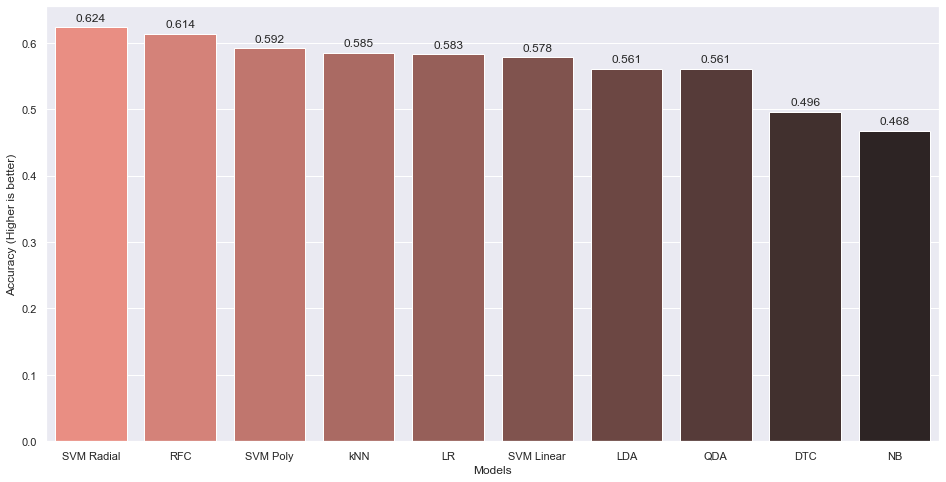

In [36]:
results = pd.DataFrame({
    "Accuracy":[
        accuracy_lr,
        accuracy_knn,
        accuracy_lda,
        accuracy_qda,
        accuracy_nb,
        accuracy_dtc,
        accuracy_rfc,
        accuracy_svm_linear,
        accuracy_svm_radial,
        accuracy_svm_polynomial
        
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (Higher is better)")

plt.show()

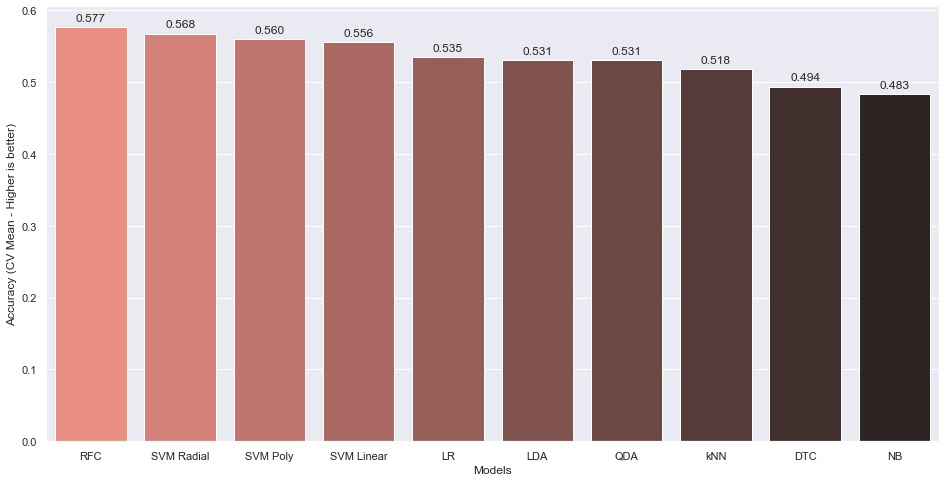

In [37]:
results = pd.DataFrame({
    "Accuracy":[
        lr_cv_scores.mean(),
        knn_cv_scores.mean(),
        lda_cv_scores.mean(),
        qda_cv_scores.mean(),
        nb_cv_scores.mean(),
        dtc_cv_scores.mean(),
        rfc_cv_scores.mean(),
        svm_linear_cv_scores.mean(),
        svm_radial_cv_scores.mean(),
        svm_polynomial_cv_scores.mean()
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (CV Mean - Higher is better)")

plt.show()

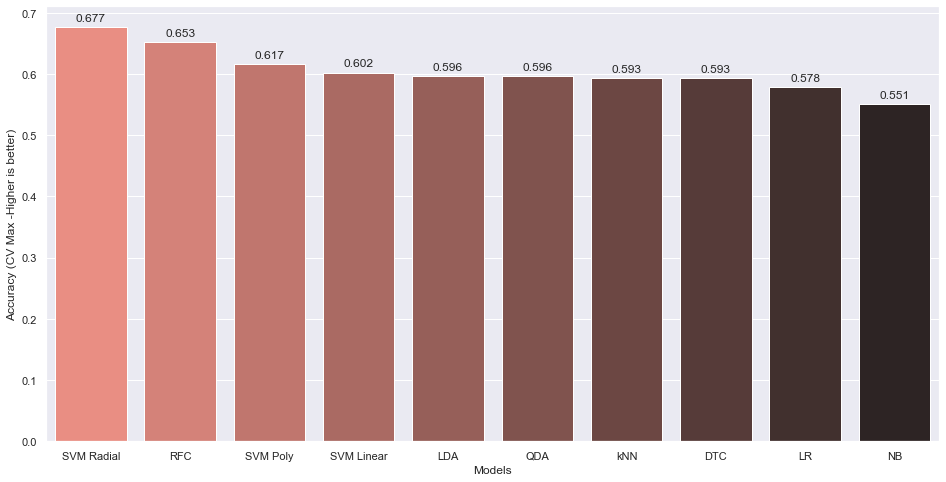

In [38]:
results = pd.DataFrame({
    "Accuracy":[
        lr_cv_scores.max(),
        knn_cv_scores.max(),
        lda_cv_scores.max(),
        qda_cv_scores.max(),
        nb_cv_scores.max(),
        dtc_cv_scores.max(),
        rfc_cv_scores.max(),
        svm_linear_cv_scores.max(),
        svm_radial_cv_scores.max(),
        svm_polynomial_cv_scores.max()
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (CV Max -Higher is better)")

plt.show()

## Model Response Time

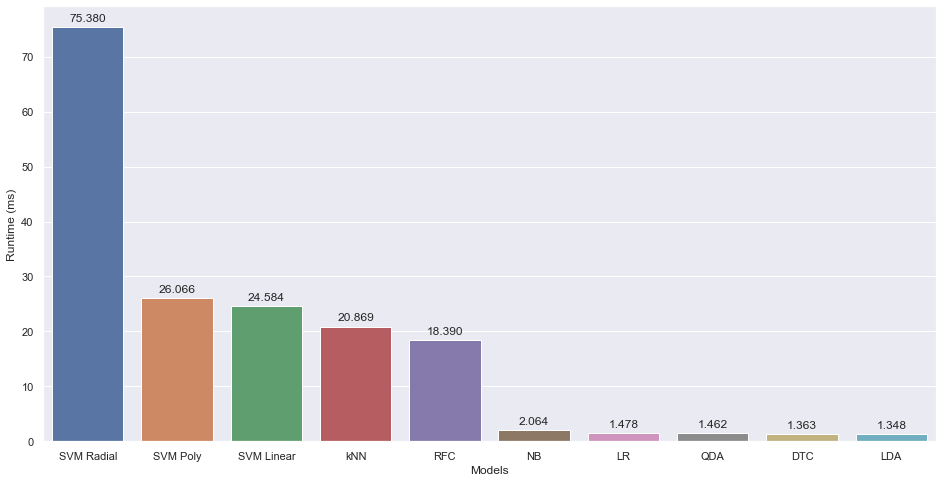

In [39]:
results = pd.DataFrame({
    "Runtime":[
        np.mean(arr_latency_lr),
        np.mean(arr_latency_knn),
        np.mean(arr_latency_lda),
        np.mean(arr_latency_qda),
        np.mean(arr_latency_nb),
        np.mean(arr_latency_dtc),
        np.mean(arr_latency_rfc),
        np.mean(arr_latency_svm_linear),
        np.mean(arr_latency_svm_radial),
        np.mean(arr_latency_svm_polynomial)
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Runtime", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Runtime",ax=ax)

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Runtime (ms)")

plt.show()

## Model Response Time (remove outlier)

In [40]:
def removeOutliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    
    return result.tolist()

In [41]:
arr_latency_lr_n = removeOutliers(arr_latency_lr)
arr_latency_knn_n = removeOutliers(arr_latency_knn)
arr_latency_lda_n = removeOutliers(arr_latency_lda)
arr_latency_qda_n = removeOutliers(arr_latency_qda)
arr_latency_nb_n = removeOutliers(arr_latency_nb)
arr_latency_dtc_n = removeOutliers(arr_latency_dtc)
arr_latency_rfc_n = removeOutliers(arr_latency_rfc)
arr_latency_svm_linear_n = removeOutliers(arr_latency_svm_linear)
arr_latency_svm_radial_n = removeOutliers(arr_latency_svm_radial)
arr_latency_svm_polynomial_n = removeOutliers(arr_latency_svm_polynomial)

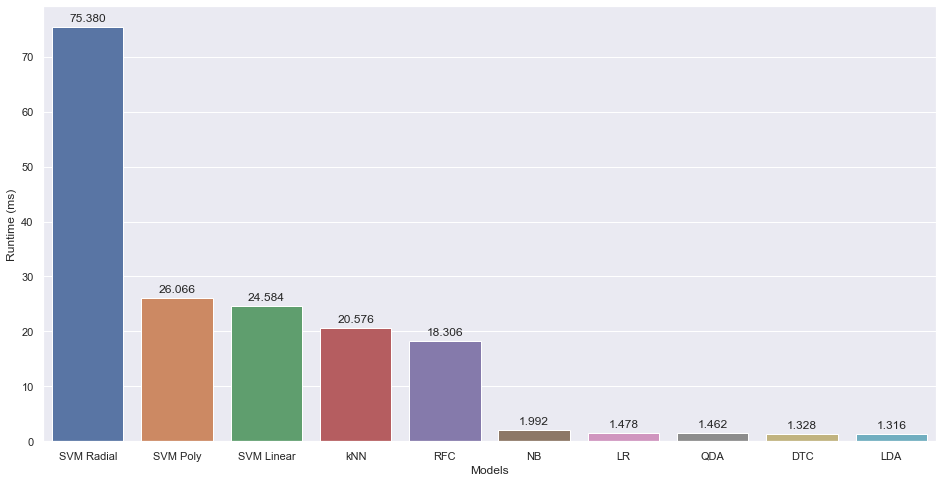

In [42]:
results = pd.DataFrame({
    "Runtime":[
        np.mean(arr_latency_lr_n),
        np.mean(arr_latency_knn_n),
        np.mean(arr_latency_lda_n),
        np.mean(arr_latency_qda_n),
        np.mean(arr_latency_nb_n),
        np.mean(arr_latency_dtc_n),
        np.mean(arr_latency_rfc_n),
        np.mean(arr_latency_svm_linear_n),
        np.mean(arr_latency_svm_radial_n),
        np.mean(arr_latency_svm_polynomial_n)
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Runtime", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Runtime",ax=ax)

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Runtime (ms)")

plt.show()